In [1]:
import datetime
import pyucrio

rio = pyucrio.PyUCRio()
rt = rio.tools

# Plot riometer data

Below, we'll go through how to plot NORSTAR riometer and SWAN Hyper-Spectral Riometer (HSR) data, separately and together!

Let's start with the NORSTAR riometers. We'll make a single plot of riometer data from a few sites, for a specific day.

In [2]:
# download and read in a day of riometer data from a couple sites
start_dt = datetime.datetime(2023, 11, 5, 0, 0)
end_dt = datetime.datetime(2023, 11, 5, 23, 59)
dataset_name = "NORSTAR_RIOMETER_K2_TXT"
site_uid = ["chur", "daws", "rabb"]
rio_data_list = []
for site in site_uid:
    # download the data
    r = rio.data.ucalgary.download(dataset_name, start_dt, end_dt, site_uid=site)

    # read the data
    data = rio.data.ucalgary.read(r.dataset, r.filenames, n_parallel=2)

    # we'll add the read data into a larger list we'll use later on
    rio_data_list.append(data)

In [3]:
# let's have a quick look at some of the timestamps from the first chunk of
# data we have
print(rio_data_list[0].data[0].timestamp)

[datetime.datetime(2023, 11, 5, 0, 0, 1)
 datetime.datetime(2023, 11, 5, 0, 0, 6)
 datetime.datetime(2023, 11, 5, 0, 0, 11) ...
 datetime.datetime(2023, 11, 5, 23, 59, 46)
 datetime.datetime(2023, 11, 5, 23, 59, 51)
 datetime.datetime(2023, 11, 5, 23, 59, 56)]


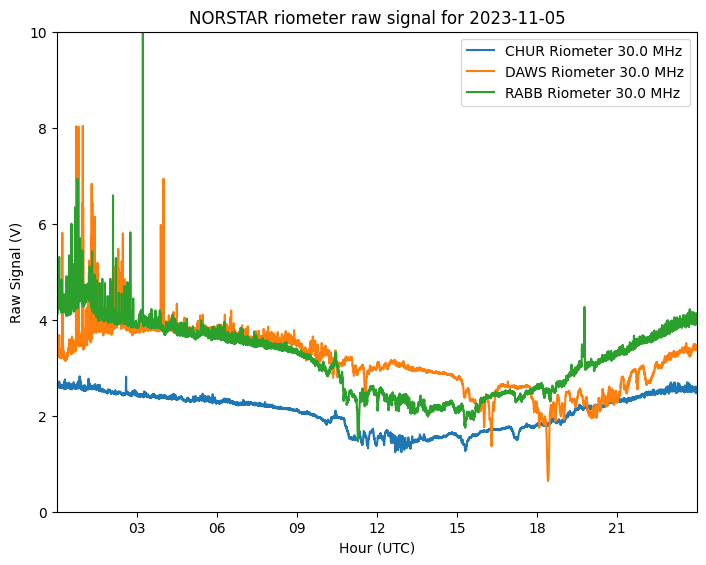

In [4]:
# now let's create a quick plot of the raw data
rt.plot(rio_data_list, yrange=(0, 10), title="NORSTAR riometer raw signal for %s" % (start_dt.strftime("%Y-%m-%d")))

If we wanted to change the plots to use a dark theme, we can do that using a handy wrapper for matplotlib's theme settings.

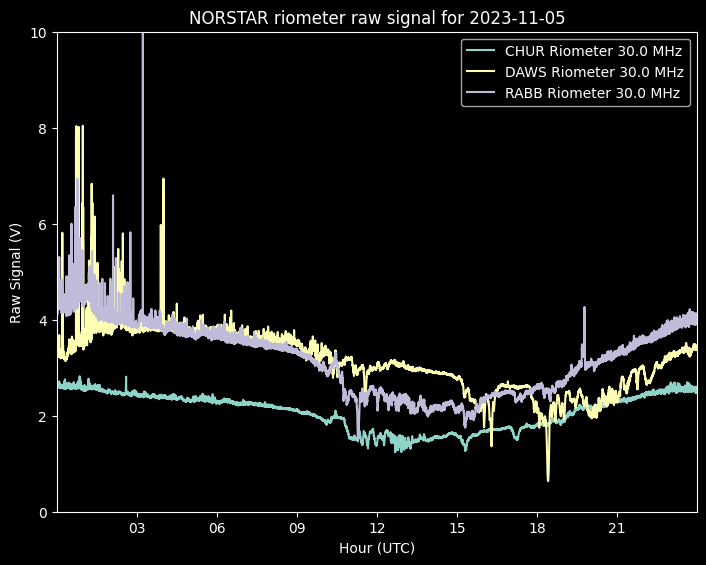

In [5]:
# set plot theme to dark mode
rt.set_theme("dark")

# let's see the plot again
rt.plot(rio_data_list, yrange=(0, 10), title="NORSTAR riometer raw signal for %s" % (start_dt.strftime("%Y-%m-%d")))

# now we'll change the plot mode back to the default
rt.set_theme("light")

We downloaded NORSTAR riometer K2 files. These files contain both raw and baseline absorption data. 

Now let's go and plot some absorption data.

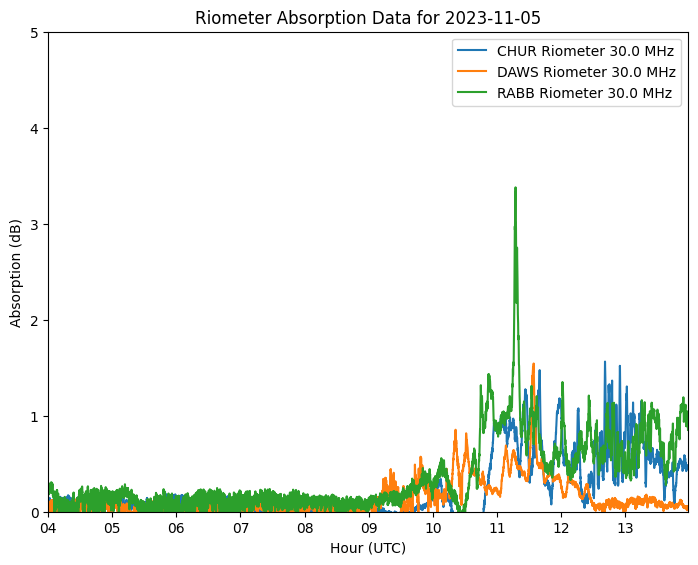

In [6]:
# we are going to restrict the plotting range in the time axis, helping
# us zoom in on a few hours of data
start_plot_dt = datetime.datetime(2023, 11, 5, 4, 0)
end_plot_dt = datetime.datetime(2023, 11, 5, 13, 59)

# plot the absorption data
rt.plot(
    rio_data_list,
    absorption=True,
    yrange=(0, 5),
    xrange=(start_plot_dt, end_plot_dt),
    title="Riometer Absorption Data for 2023-11-05",
)

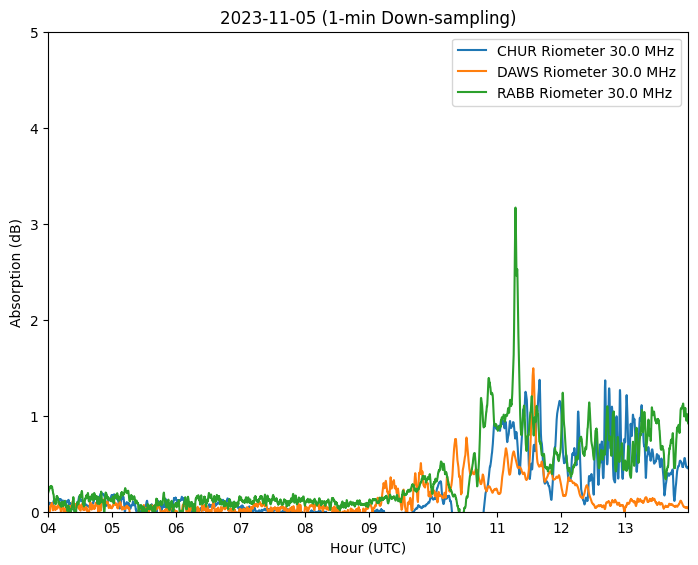

In [7]:
# plot again, this time down-sampling to 1-minute intervals
rt.plot(rio_data_list,
        absorption=True,
        yrange=(0, 5),
        xrange=(start_plot_dt, end_plot_dt),
        downsample_seconds=60,
        title="2023-11-05 (1-min Down-sampling)")

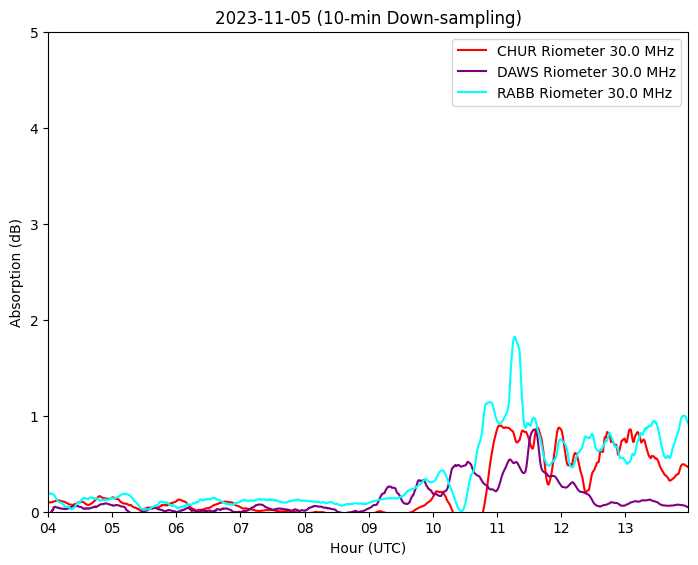

In [8]:
# and again, using 10-minute intervals and changing up the colors
rt.plot(rio_data_list,
        absorption=True,
        yrange=(0, 5),
        xrange=(start_plot_dt, end_plot_dt),
        color=["red", "purple", "cyan"],
        downsample_seconds=600,
        title="2023-11-05 (10-min Down-sampling)")

OK, now let's have a look at some of the SWAN Hyper-Spectral Riometer (HSR) data.

We'll download and read in a few hours of data from two sites.

In [9]:
# download a few hours of SWAN HSR data from two sites
start_dt = datetime.datetime(2023, 11, 5, 4, 0)
end_dt = datetime.datetime(2023, 11, 5, 13, 59)
dataset_name = "SWAN_HSR_K0_H5"
site_uid = ["medo", "russ"]
hsr_data_list = []
for site in site_uid:
    # download the data
    r = rio.data.ucalgary.download(dataset_name, start_dt, end_dt, site_uid=site)

    # read the data
    data = rio.data.ucalgary.read(r.dataset, r.filenames, n_parallel=2)

    # append to a list that we'll use later
    hsr_data_list.append(data)

NORSTAR riometer data is a single frequency, at 30Mhz. However, HSR data is many frequencies! The K0 data that is provided are selected frequencies that are configured by the instrument operations team for the best results.

We can look at the various bands available easily by poking closer at the `HSRData` objects we get after reading.

In [10]:
# print out the data attribute for the first HSRData object we have
hsr_data_list[0].data[0].pretty_print()
print()

# let's see the available frequencies
print("Available frequencies: %s" % (hsr_data_list[0].data[0].band_central_frequency))

# and their passbands
print("Respective passbands:  %s" % (hsr_data_list[0].data[0].band_passband))


HSRData:
  band_central_frequency  : [11 central frequencies]
  band_passband           : [11 passbands]
  timestamp               : array(dims=(86400,), dtype=object)
  raw_power               : array(dims=(11, 86400), dtype=float32)
  absorption              : None

Available frequencies: ['30.00 MHz', '20.00 MHz', '22.00 MHz', '24.00 MHz', '26.00 MHz', '28.00 MHz', '32.00 MHz', '34.00 MHz', '36.00 MHz', '38.00 MHz', '40.00 MHz']
Respective passbands:  ['85.45 kHz', '73.24 kHz', '183.10 kHz', '170.90 kHz', '48.83 kHz', '36.62 kHz', '195.31 kHz', '97.66 kHz', '158.69 kHz', '158.69 kHz', '183.10 kHz']


You'll notice that the 0th index of the `band_central_frequency` and `band_passband` parameters is the 30MHz band. This is done on purpose, so that the first band of HSR data is always the same as the traditional riometers.

Ok, now that we know about the fact that HSR data has multiple bands, let's plot a few of them.

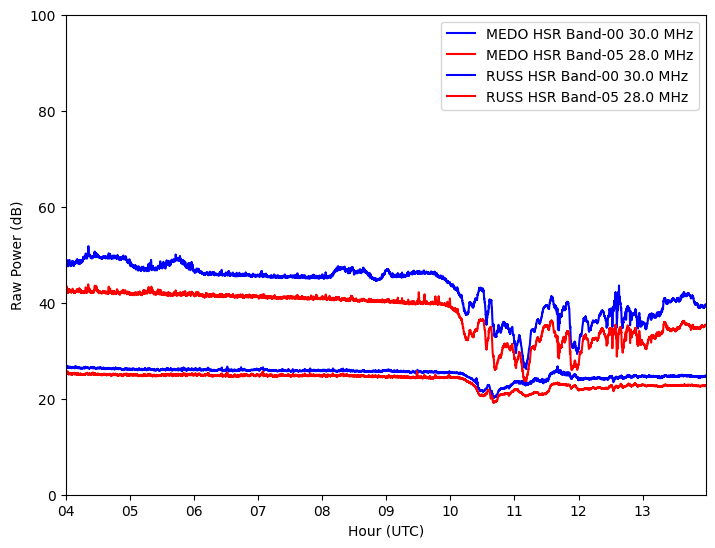

In [11]:
# we're going to plot bands 0 and 5
hsr_bands = [0, 5]

# plot it
rt.plot(
    hsr_data_list,
    yrange=(0, 100),
    xrange=(start_plot_dt, end_plot_dt),
    hsr_bands=hsr_bands,
    color=["blue", "red"],
    downsample_seconds=10,
)

If you'd like to plot a larger number of bands, a stack-plot can be easier to read.

Let's make one!

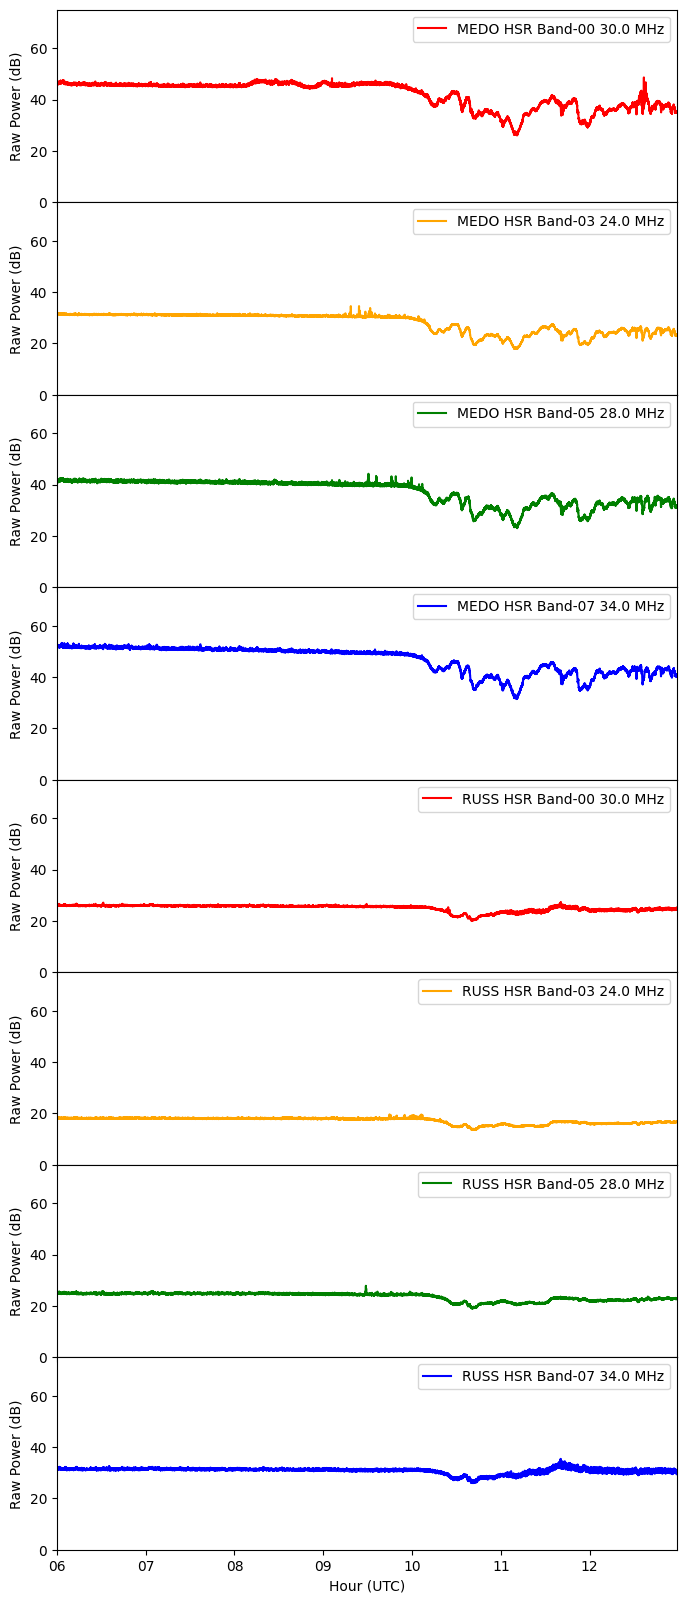

In [12]:
# again, we'll restrict our plotting range a bit in the time axis
# to focus on a few hours of data
plot_start_dt = datetime.datetime(2023, 11, 5, 6, 0)
plot_end_dt = datetime.datetime(2023, 11, 5, 12, 59)

# select a few more bands
hsr_bands = [0, 3, 5, 7]
colors = ["red", "orange", "green", "blue"]

# plot it, but this time we enable the stack plot option (let's also set the figure size manually)
rt.plot(
    hsr_data_list,
    yrange=(0, 75),
    xrange=(plot_start_dt, plot_end_dt),
    hsr_bands=hsr_bands,
    color=colors,
    stack_plot=True,
    figsize=(8, 20),
)